<a href="https://colab.research.google.com/github/asvkashyap/Premier-League-Match-win-prediction-model-/blob/main/Matchwinner_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [4]:
data = pd.read_csv("/content/drive/MyDrive/matches.csv",index_col=0)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cols_to_remove = ["round","time","comp","day","attendance",'captain', 'formation',
       'referee', 'match report', 'notes', 'dist', 'season', 'gf', 'ga']

In [6]:
data1 = data.drop(cols_to_remove, axis='columns')

In [7]:
data1.head()

,date,venue,result,opponent,xg,xga,poss,sh,sot,fk,pk,pkatt,team
1,2021-08-15,Away,L,Tottenham,1.9,1.3,64.0,18.0,4.0,1.0,0.0,0.0,Manchester City
2,2021-08-21,Home,W,Norwich City,2.7,0.1,67.0,16.0,4.0,1.0,0.0,0.0,Manchester City
3,2021-08-28,Home,W,Arsenal,3.8,0.1,80.0,25.0,10.0,0.0,0.0,0.0,Manchester City
4,2021-09-11,Away,W,Leicester City,2.9,0.8,61.0,25.0,8.0,0.0,0.0,0.0,Manchester City
6,2021-09-18,Home,D,Southampton,1.1,0.4,63.0,16.0,1.0,1.0,0.0,0.0,Manchester City


In [ ]:
data1.tail()

,date,venue,result,opponent,xg,xga,poss,sh,sot,fk,pk,pkatt,team
38,2021-05-02,Away,L,Tottenham,0.5,2.0,34.0,8.0,1.0,0.0,0.0,0.0,Sheffield United
39,2021-05-08,Home,L,Crystal Palace,0.7,2.1,50.0,7.0,0.0,1.0,0.0,0.0,Sheffield United
40,2021-05-16,Away,W,Everton,1.6,1.3,38.0,10.0,3.0,0.0,0.0,0.0,Sheffield United
41,2021-05-19,Away,L,Newcastle Utd,0.8,1.5,50.0,11.0,1.0,1.0,0.0,0.0,Sheffield United
42,2021-05-23,Home,W,Burnley,0.6,1.0,41.0,12.0,3.0,0.0,0.0,0.0,Sheffield United


//standard scaling
//cat coding
//lazy predict 60 - 80

In [ ]:
data1

,date,venue,result,opponent,xg,xga,poss,sh,sot,fk,pk,pkatt,team
1,2021-08-15,Away,L,Tottenham,1.9,1.3,64.0,18.0,4.0,1.0,0.0,0.0,Manchester City
2,2021-08-21,Home,W,Norwich City,2.7,0.1,67.0,16.0,4.0,1.0,0.0,0.0,Manchester City
3,2021-08-28,Home,W,Arsenal,3.8,0.1,80.0,25.0,10.0,0.0,0.0,0.0,Manchester City
4,2021-09-11,Away,W,Leicester City,2.9,0.8,61.0,25.0,8.0,0.0,0.0,0.0,Manchester City
6,2021-09-18,Home,D,Southampton,1.1,0.4,63.0,16.0,1.0,1.0,0.0,0.0,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,Away,L,Tottenham,0.5,2.0,34.0,8.0,1.0,0.0,0.0,0.0,Sheffield United
39,2021-05-08,Home,L,Crystal Palace,0.7,2.1,50.0,7.0,0.0,1.0,0.0,0.0,Sheffield United
40,2021-05-16,Away,W,Everton,1.6,1.3,38.0,10.0,3.0,0.0,0.0,0.0,Sheffield United
41,2021-05-19,Away,L,Newcastle Utd,0.8,1.5,50.0,11.0,1.0,1.0,0.0,0.0,Sheffield United


In [8]:
data1["date"]=pd.to_datetime(data1["date"])

In [9]:
data1.dtypes

date        datetime64[ns]
venue               object
result              object
opponent            object
xg                 float64
xga                float64
poss               float64
sh                 float64
sot                float64
fk                 float64
pk                 float64
pkatt              float64
team                object
dtype: object

In [10]:
data1["venue_code"] = data1["venue"].astype("category").cat.codes
data1["opp_code"]=data1["opponent"].astype("category").cat.codes
data1["day_code"]=data1["date"].dt.dayofweek
data1["team_code"]=data1["team"].astype("category").cat.codes

In [54]:
features=["venue_code","opp_code","day_code","xg","xga","poss","sh","sot","fk","pk","pkatt"]

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
std_scaler = StandardScaler()

In [55]:
X1 = data1[features]

In [56]:
X1

,venue_code,opp_code,day_code,xg,xga,poss,sh,sot,fk,pk,pkatt
1,0,18,6,1.90,1.30,64.00,18.00,4.00,1.00,0.00,0.00
2,1,15,5,2.70,0.10,67.00,16.00,4.00,1.00,0.00,0.00
3,1,0,5,3.80,0.10,80.00,25.00,10.00,0.00,0.00,0.00
4,0,10,5,2.90,0.80,61.00,25.00,8.00,0.00,0.00,0.00
6,1,17,5,1.10,0.40,63.00,16.00,1.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
38,0,18,6,0.50,2.00,34.00,8.00,1.00,0.00,0.00,0.00
39,1,6,5,0.70,2.10,50.00,7.00,0.00,1.00,0.00,0.00
40,0,7,6,1.60,1.30,38.00,10.00,3.00,0.00,0.00,0.00
41,0,14,2,0.80,1.50,50.00,11.00,1.00,1.00,0.00,0.00


In [72]:
X1 = std_scaler.fit_transform(X1)
Y =(data1["result"]=="W").astype("int")

In [65]:
print(X1)

[[-0.99928032  1.10590049  0.89097897 ...  0.81827671 -0.33946049
  -0.38071089]
 [ 1.0007202   0.65125493  0.36945778 ...  0.81827671 -0.33946049
  -0.38071089]
 [ 1.0007202  -1.62197284  0.36945778 ... -0.68514439 -0.33946049
  -0.38071089]
 ...
 [-0.99928032 -0.56113321  0.89097897 ... -0.68514439 -0.33946049
  -0.38071089]
 [-0.99928032  0.49970642 -1.19510579 ...  0.81827671 -0.33946049
  -0.38071089]
 [ 1.0007202  -1.01577876  0.89097897 ... -0.68514439 -0.33946049
  -0.38071089]]


In [73]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1,Y, test_size=0.2, random_state=50)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1111, 11)
X_test shape: (278, 11)
y_train shape: (1111,)
y_test shape: (278,)


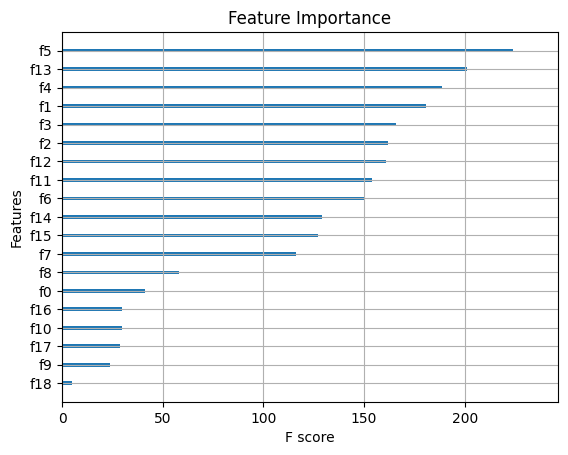

In [71]:
# Plot feature importance
xgb.plot_importance(xgb_classifier, importance_type='weight', show_values=False, title='Feature Importance')
plt.show()

In [74]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

precision = precision_score(y_test, y_pred)


# Evaluate the accuracy and precision of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Precision: {precision}")


Accuracy: 0.7482014388489209
Precision: 0.7


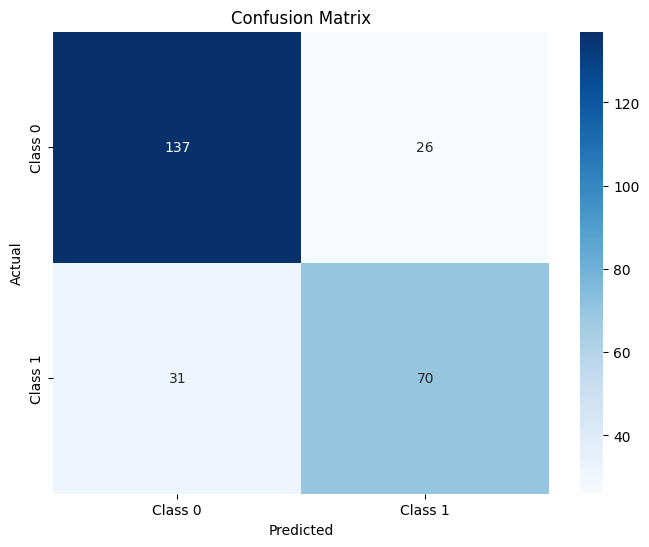

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# xgb_classifier.fit(X_train, y_train)
# y_pred = xgb_classifier.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
data1

,date,venue,result,opponent,xg,xga,poss,sh,sot,fk,pk,pkatt,team,venue_code,opp_code,day_code,team_code
1,2021-08-15,Away,L,Tottenham,1.90,1.30,64.00,18.00,4.00,1.00,0.00,0.00,Manchester City,0,18,6,12
2,2021-08-21,Home,W,Norwich City,2.70,0.10,67.00,16.00,4.00,1.00,0.00,0.00,Manchester City,1,15,5,12
3,2021-08-28,Home,W,Arsenal,3.80,0.10,80.00,25.00,10.00,0.00,0.00,0.00,Manchester City,1,0,5,12
4,2021-09-11,Away,W,Leicester City,2.90,0.80,61.00,25.00,8.00,0.00,0.00,0.00,Manchester City,0,10,5,12
6,2021-09-18,Home,D,Southampton,1.10,0.40,63.00,16.00,1.00,1.00,0.00,0.00,Manchester City,1,17,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,Away,L,Tottenham,0.50,2.00,34.00,8.00,1.00,0.00,0.00,0.00,Sheffield United,0,18,6,16
39,2021-05-08,Home,L,Crystal Palace,0.70,2.10,50.00,7.00,0.00,1.00,0.00,0.00,Sheffield United,1,6,5,16
40,2021-05-16,Away,W,Everton,1.60,1.30,38.00,10.00,3.00,0.00,0.00,0.00,Sheffield United,0,7,6,16
41,2021-05-19,Away,L,Newcastle Utd,0.80,1.50,50.00,11.00,1.00,1.00,0.00,0.00,Sheffield United,0,14,2,16


In [14]:
grouped_matches= data1.groupby("team")

In [15]:
group = grouped_matches.get_group("Arsenal")

In [16]:
group

,date,venue,result,opponent,xg,xga,poss,sh,sot,fk,pk,pkatt,team,venue_code,opp_code,day_code,team_code
0,2021-08-13,Away,L,Brentford,1.4,1.3,66.0,22.0,4.0,1.0,0.0,0.0,Arsenal,0,2,4,0
1,2021-08-22,Home,L,Chelsea,0.3,2.9,35.0,6.0,3.0,0.0,0.0,0.0,Arsenal,1,5,6,0
3,2021-08-28,Away,L,Manchester City,0.1,3.8,20.0,1.0,0.0,0.0,0.0,0.0,Arsenal,0,12,5,0
4,2021-09-11,Home,W,Norwich City,2.8,0.6,52.0,30.0,6.0,1.0,0.0,0.0,Arsenal,1,15,5,0
5,2021-09-18,Away,W,Burnley,1.2,1.3,54.0,13.0,3.0,1.0,0.0,0.0,Arsenal,0,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,2021-05-02,Away,W,Newcastle Utd,1.9,0.2,61.0,19.0,4.0,1.0,0.0,0.0,Arsenal,0,14,6,0
54,2021-05-09,Home,W,West Brom,0.9,1.3,65.0,15.0,7.0,1.0,0.0,0.0,Arsenal,1,20,6,0
55,2021-05-12,Away,W,Chelsea,0.8,2.1,33.0,5.0,2.0,0.0,0.0,0.0,Arsenal,0,5,2,0
56,2021-05-19,Away,W,Crystal Palace,1.3,1.0,67.0,6.0,3.0,0.0,0.0,0.0,Arsenal,0,6,2,0


In [17]:
features1=["xg","xga","poss","sh","sot","fk","pk","pkatt"]
newfeatures=[f"{c}_rolling"for c in features1]

In [18]:
def rolling_avg(group,features1,newfeatures):
  group = group.sort_values("date")
  rolling_stats = group[features1].rolling(3,closed= 'left').mean()
  group[newfeatures]=rolling_stats
  group = group.dropna(subset=newfeatures, how="any")
  return group

In [19]:
group

,date,venue,result,opponent,xg,xga,poss,sh,sot,fk,pk,pkatt,team,venue_code,opp_code,day_code,team_code
0,2021-08-13,Away,L,Brentford,1.4,1.3,66.0,22.0,4.0,1.0,0.0,0.0,Arsenal,0,2,4,0
1,2021-08-22,Home,L,Chelsea,0.3,2.9,35.0,6.0,3.0,0.0,0.0,0.0,Arsenal,1,5,6,0
3,2021-08-28,Away,L,Manchester City,0.1,3.8,20.0,1.0,0.0,0.0,0.0,0.0,Arsenal,0,12,5,0
4,2021-09-11,Home,W,Norwich City,2.8,0.6,52.0,30.0,6.0,1.0,0.0,0.0,Arsenal,1,15,5,0
5,2021-09-18,Away,W,Burnley,1.2,1.3,54.0,13.0,3.0,1.0,0.0,0.0,Arsenal,0,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,2021-05-02,Away,W,Newcastle Utd,1.9,0.2,61.0,19.0,4.0,1.0,0.0,0.0,Arsenal,0,14,6,0
54,2021-05-09,Home,W,West Brom,0.9,1.3,65.0,15.0,7.0,1.0,0.0,0.0,Arsenal,1,20,6,0
55,2021-05-12,Away,W,Chelsea,0.8,2.1,33.0,5.0,2.0,0.0,0.0,0.0,Arsenal,0,5,2,0
56,2021-05-19,Away,W,Crystal Palace,1.3,1.0,67.0,6.0,3.0,0.0,0.0,0.0,Arsenal,0,6,2,0


In [81]:
rolling_avg(group,features1,newfeatures)

,date,venue,result,opponent,xg,xga,poss,sh,sot,fk,...,day_code,team_code,xg_rolling,xga_rolling,poss_rolling,sh_rolling,sot_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,Home,W,Sheffield Utd,0.40,0.20,63.00,6.00,5.00,0.00,...,6,0,1.47,1.77,50.00,7.67,3.67,0.67,0.00,0.00
7,2020-10-17,Away,L,Manchester City,0.90,1.50,41.00,11.00,3.00,2.00,...,5,0,1.00,1.77,52.67,5.33,3.67,0.00,0.00,0.00
9,2020-10-25,Home,L,Leicester City,0.90,1.20,57.00,12.00,4.00,1.00,...,6,0,0.83,1.63,45.67,7.00,3.67,0.67,0.00,0.00
11,2020-11-01,Away,W,Manchester Utd,1.10,0.30,47.00,6.00,1.00,0.00,...,6,0,0.73,0.97,53.67,9.67,4.00,1.00,0.00,0.00
13,2020-11-08,Home,L,Aston Villa,1.50,1.70,58.00,13.00,2.00,0.00,...,6,0,0.97,1.00,48.33,9.67,2.67,1.00,0.33,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2022-04-04,Away,L,Crystal Palace,0.80,1.60,67.00,12.00,3.00,0.00,...,0,0,1.37,0.50,50.00,13.00,3.67,0.00,0.33,0.33
36,2022-04-09,Home,L,Brighton,1.80,0.50,63.00,20.00,4.00,2.00,...,5,0,0.87,0.93,57.00,10.33,2.67,0.00,0.00,0.00
37,2022-04-16,Away,L,Southampton,1.70,0.70,75.00,23.00,6.00,1.00,...,5,0,1.30,0.83,61.33,14.00,3.33,0.67,0.00,0.00
38,2022-04-20,Away,W,Chelsea,2.50,0.70,34.00,13.00,3.00,0.00,...,2,0,1.43,0.93,68.33,18.33,4.33,1.00,0.00,0.00


In [82]:
matches_rolling = data1.groupby("team").apply(lambda x:rolling_avg(x,features1,newfeatures))

In [83]:
matches_rolling= matches_rolling.droplevel("team")

In [84]:
matches_rolling

,date,venue,result,opponent,xg,xga,poss,sh,sot,fk,...,day_code,team_code,xg_rolling,xga_rolling,poss_rolling,sh_rolling,sot_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,Home,W,Sheffield Utd,0.40,0.20,63.00,6.00,5.00,0.00,...,6,0,1.47,1.77,50.00,7.67,3.67,0.67,0.00,0.00
7,2020-10-17,Away,L,Manchester City,0.90,1.50,41.00,11.00,3.00,2.00,...,5,0,1.00,1.77,52.67,5.33,3.67,0.00,0.00,0.00
9,2020-10-25,Home,L,Leicester City,0.90,1.20,57.00,12.00,4.00,1.00,...,6,0,0.83,1.63,45.67,7.00,3.67,0.67,0.00,0.00
11,2020-11-01,Away,W,Manchester Utd,1.10,0.30,47.00,6.00,1.00,0.00,...,6,0,0.73,0.97,53.67,9.67,4.00,1.00,0.00,0.00
13,2020-11-08,Home,L,Aston Villa,1.50,1.70,58.00,13.00,2.00,0.00,...,6,0,0.97,1.00,48.33,9.67,2.67,1.00,0.33,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,Away,W,Everton,0.80,0.50,60.00,14.00,3.00,0.00,...,6,22,0.73,1.87,62.67,12.33,3.67,0.00,0.00,0.00
33,2022-03-18,Home,L,Leeds United,0.80,2.20,47.00,14.00,8.00,0.00,...,4,22,0.73,1.33,62.67,12.33,4.33,0.00,0.00,0.00
34,2022-04-02,Home,W,Aston Villa,1.20,2.10,49.00,11.00,4.00,0.00,...,5,22,0.83,1.20,57.33,13.00,5.33,0.00,0.00,0.00
35,2022-04-08,Away,L,Newcastle Utd,0.30,1.60,58.00,5.00,2.00,0.00,...,4,22,0.93,1.60,52.00,13.00,5.00,0.00,0.00,0.00


In [24]:
matches_rolling.index =range(matches_rolling.shape[0])

In [25]:
matches_rolling

,date,venue,result,opponent,xg,xga,poss,sh,sot,fk,...,day_code,team_code,xg_rolling,xga_rolling,poss_rolling,sh_rolling,sot_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,Home,W,Sheffield Utd,0.4,0.2,63.0,6.0,5.0,0.0,...,6,0,1.466667,1.766667,50.000000,7.666667,3.666667,0.666667,0.000000,0.000000
1,2020-10-17,Away,L,Manchester City,0.9,1.5,41.0,11.0,3.0,2.0,...,5,0,1.000000,1.766667,52.666667,5.333333,3.666667,0.000000,0.000000,0.000000
2,2020-10-25,Home,L,Leicester City,0.9,1.2,57.0,12.0,4.0,1.0,...,6,0,0.833333,1.633333,45.666667,7.000000,3.666667,0.666667,0.000000,0.000000
3,2020-11-01,Away,W,Manchester Utd,1.1,0.3,47.0,6.0,1.0,0.0,...,6,0,0.733333,0.966667,53.666667,9.666667,4.000000,1.000000,0.000000,0.000000
4,2020-11-08,Home,L,Aston Villa,1.5,1.7,58.0,13.0,2.0,0.0,...,6,0,0.966667,1.000000,48.333333,9.666667,2.666667,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,2022-03-13,Away,W,Everton,0.8,0.5,60.0,14.0,3.0,0.0,...,6,22,0.733333,1.866667,62.666667,12.333333,3.666667,0.000000,0.000000,0.000000
1316,2022-03-18,Home,L,Leeds United,0.8,2.2,47.0,14.0,8.0,0.0,...,4,22,0.733333,1.333333,62.666667,12.333333,4.333333,0.000000,0.000000,0.000000
1317,2022-04-02,Home,W,Aston Villa,1.2,2.1,49.0,11.0,4.0,0.0,...,5,22,0.833333,1.200000,57.333333,13.000000,5.333333,0.000000,0.000000,0.000000
1318,2022-04-08,Away,L,Newcastle Utd,0.3,1.6,58.0,5.0,2.0,0.0,...,4,22,0.933333,1.600000,52.000000,13.000000,5.000000,0.000000,0.000000,0.000000


In [26]:
matches_rolling.columns

Index(['date', 'venue', 'result', 'opponent', 'xg', 'xga', 'poss', 'sh', 'sot',
       'fk', 'pk', 'pkatt', 'team', 'venue_code', 'opp_code', 'day_code',
       'team_code', 'xg_rolling', 'xga_rolling', 'poss_rolling', 'sh_rolling',
       'sot_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling'],
      dtype='object')

In [27]:
finalfeats = ['venue_code', 'opp_code',
       'team_code', 'xg_rolling', 'xga_rolling', 'poss_rolling', 'sh_rolling',
       'sot_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling','xg', 'xga', 'poss', 'sh', 'sot',
       'fk', 'pk', 'pkatt']

In [28]:
X3 = matches_rolling[finalfeats]
X3 = std_scaler.fit_transform(X3)

In [29]:
X3

array([[ 1.        ,  0.80177262, -1.59561267, ..., -0.68580417,
        -0.33274414, -0.37374111],
       [-1.        ,  0.19605515, -1.59561267, ...,  2.31175048,
        -0.33274414, -0.37374111],
       [ 1.        , -0.10680359, -1.59561267, ...,  0.81297315,
        -0.33274414, -0.37374111],
       ...,
       [ 1.        , -1.46966792,  1.69814565, ..., -0.68580417,
        -0.33274414, -0.37374111],
       [-1.        ,  0.49891389,  1.69814565, ..., -0.68580417,
        -0.33274414, -0.37374111],
       [-1.        , -1.01537981,  1.69814565, ..., -0.68580417,
        -0.33274414, -0.37374111]])

In [30]:
Y =(matches_rolling["result"]=="W").astype("int")

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X3,Y, test_size=0.2, random_state=50)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1056, 19)
X_test shape: (264, 19)
y_train shape: (1056,)
y_test shape: (264,)


In [34]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

 97%|█████████▋| 28/29 [00:07<00:00,  1.56it/s]

[LightGBM] [Info] Number of positive: 396, number of negative: 660
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 1056, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826


100%|██████████| 29/29 [00:08<00:00,  3.55it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.77               0.75     0.75      0.77   
RidgeClassifierCV                  0.78               0.74     0.74      0.77   
RidgeClassifier                    0.78               0.74     0.74      0.77   
LogisticRegression                 0.77               0.74     0.74      0.77   
LinearDiscriminantAnalysis         0.78               0.74     0.74      0.77   
CalibratedClassifierCV             0.77               0.74     0.74      0.77   
LinearSVC                          0.77               0.74     0.74      0.76   
NuSVC                              0.77               0.74     0.74      0.76   
XGBClassifier                      0.75               0.73     0.73      0.75   
SVC                                0.76               0.73     0.73      0.76   
RandomForestClassifier      

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


# Create adaboost classifer
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


# Evaluate the accuracy and precision of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Precision: {precision}")

Accuracy: 0.7840909090909091
Precision: 0.7291666666666666


In [80]:
from sklearn.linear_model import RidgeClassifierCV


clf2 = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)


# Make predictions on the test set
y_pred = clf2.predict(X_test)


# Evaluate the accuracy and precision of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Precision: {precision}")



Accuracy: 0.7805755395683454
Precision: 0.8024691358024691
